# Exploratory data analysis of the Cheese datasets
 Title : Final project Machine Learning
 
 Author: Daniel Fu Yaw Yang


# Introduction

## Question of interests

In this analysis, I will be analysing the cheese datasets.

I am interested in trying to get the highest precision of the fat level for the cheeses provided

• canadian_cheese.csv
– This file contains information on cheese only from canada 
• cheese.csv
– This file includes information on cheese that we are more interested in :-  moisture % and fat level

Let us start by importing methods and the tables to do some basic visualizations

In [7]:
import pandas as pd
import altair as alt

import sklearn
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (FunctionTransformer, Normalizer, OneHotEncoder, StandardScaler, normalize, scale)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report

In [11]:
# import all the required files

#canada_cheese_url = 'https://github.com/UBC-MDS/intro-ml-students/blob/main/release/final_project/data/canadianCheeseDirectory.csv'
canadian_cheese_df = pd.read_csv("intro-ml-students/release/final_project/data/canadianCheeseDirectory.csv")
#pd.read_csv(canada_cheese_url)

#cheese_url='https://github.com/UBC-MDS/intro-ml-students/blob/main/release/final_project/data/cheese_data.csv'
cheese_df = pd.read_csv("intro-ml-students/release/final_project/data/cheese_data.csv")
#pd.read_csv(cheese_url)

In [12]:
canadian_cheese_df.head()

,CheeseId,CheeseNameEn,CheeseNameFr,ManufacturerNameEn,ManufacturerNameFr,ManufacturerProvCode,ManufacturingTypeEn,ManufacturingTypeFr,WebSiteEn,WebSiteFr,...,Organic,CategoryTypeEn,CategoryTypeFr,MilkTypeEn,MilkTypeFr,MilkTreatmentTypeEn,MilkTreatmentTypeFr,RindTypeEn,RindTypeFr,LastUpdateDate
0,228,NaN,Sieur de Duplessis (Le),NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,0,Firm Cheese,Pâte ferme,Ewe,Brebis,Raw Milk,Lait cru,Washed Rind,Croûte lavée,2016-02-03
1,242,NaN,Tomme Le Champ Doré,NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,0,Semi-soft Cheese,Pâte demi-ferme,Cow,Vache,Raw Milk,Lait cru,Washed Rind,Croûte lavée,2016-02-03
2,301,Provolone Sette Fette (Tre-Stelle),Provolone Sette Fette (Tre-Stelle),Tre Stelle (Arla Foods),NaN,ON,Industrial,Industrielle,http://www.trestelle.ca/english/,http://www.trestelle.ca/francais/,...,0,Firm Cheese,Pâte ferme,Cow,Vache,Pasteurized,Pasteurisé,NaN,NaN,2016-02-03
3,303,NaN,Geai Bleu (Le),NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,0,Veined Cheeses,Pâte persillée,Cow,Vache,Raw Milk,Lait cru,NaN,NaN,2016-02-03
4,319,NaN,Gamin (Le),NaN,Fromages la faim de loup,NB,Farmstead,Fermière,NaN,NaN,...,1,Semi-soft Cheese,Pâte demi-ferme,Cow,Vache,Raw Milk,Lait cru,Washed Rind,Croûte lavée,2016-02-03


In [13]:
cheese_df.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


There are some features here that we will be dropping as they wont be helping us with our prediction;
- CheeseId,
- ManufacturerProvCode,
- ManufacturingTypeEn,
- CharacteristicsEn,
- RindTypeEn,
- CheeseName

In [15]:
cheese_train_df=train_df = cheese_df.drop(columns=['CheeseId','ManufacturerProvCode', 'ManufacturingTypeEn','CharacteristicsEn', 'RindTypeEn', 'CheeseName'])

cheese_train_df

,MoisturePercent,FlavourEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,FatLevel
0,47.0,"Sharp, lactic",0,Firm Cheese,Ewe,Raw Milk,lower fat
1,47.9,"Sharp, lactic, lightly caramelized",0,Semi-soft Cheese,Cow,Raw Milk,lower fat
2,54.0,"Mild, tangy, and fruity",0,Firm Cheese,Cow,Pasteurized,lower fat
3,47.0,Sharp with fruity notes and a hint of wild honey,0,Veined Cheeses,Cow,Raw Milk,lower fat
4,49.4,Softer taste,1,Semi-soft Cheese,Cow,Raw Milk,lower fat
...,...,...,...,...,...,...,...
1037,37.0,"Dill, Caraway, Chili Pepper, Cumin, Sage, Chiv...",1,Hard Cheese,Cow,Pasteurized,higher fat
1038,46.0,Mild and Deep Flavor,0,Fresh Cheese,Cow,Pasteurized,lower fat
1039,40.0,Grassy tang and restrained saltiness that refl...,0,Veined Cheeses,Ewe,Thermised,higher fat
1040,34.0,Sweet and tangy flavours combine with hoppy no...,0,Semi-soft Cheese,Ewe,Thermised,higher fat


Now we can import the data and split it to train and test data frames.

The dataframe will be split into train and test data and into a ratio 8:2 for the respective data and named `X_train`, `y_train`, `X_test` and `y_test` using a random_state of 123.

In [16]:
train_df, test_df = train_test_split(cheese_train_df, test_size=0.2, random_state=123)

Now we are going to use info() to check if there are null values.. We will also see the percentage of
lower fat and higher fat in the dataset provided

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 482 to 1041
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MoisturePercent      821 non-null    float64
 1   FlavourEn            637 non-null    object 
 2   Organic              833 non-null    int64  
 3   CategoryTypeEn       813 non-null    object 
 4   MilkTypeEn           832 non-null    object 
 5   MilkTreatmentTypeEn  781 non-null    object 
 6   FatLevel             833 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 52.1+ KB


from this data it looks like MoisturePercent and Organic column will help with our prediction as our feature for our target- Fatlevel as they have the least non-null entries and we arent really interested in milk type

But before that there are null values in our dataframe and we will try to "fix" it later after we find which feature will help us best

In [19]:
Moisture_to_fat = alt.Chart(train_df).mark_bar().encode(
    alt.X('FatLevel:N', title="Fat Level"),
    alt.Y('MoisturePercent:Q', title="Moisture Percent")
).properties(title='Percentage of Moisture to Fat level')
Moisture_to_fat

alt.Chart(...)

According to this bar graph, higher fat level has a lower moisture percentage.

Now lets look at if Organic has any correlation:

In [25]:
Organic_to_fat= alt.Chart(train_df).mark_bar().encode(
    alt.X('FatLevel:N', title="Fat Level"),
    alt.Y("Organic:N", title="Organic or not")
).properties(width= 300,height = 300, title="Organic to Fat level")
Organic_to_fat

alt.Chart(...)

Now we can compare these two features using the plotted graph and it seems that the Moisture percentage will be the most helpful to help us with our prediction
I am going to use the column `FatLevel` column as my target y and everything else that is left as feature X

In [40]:
X_train, y_train = train_df.drop(columns=['FatLevel']), train_df['FatLevel']
X_test, y_test = test_df.drop(columns=['FatLevel']), test_df['FatLevel']

In [72]:
train_df['FatLevel'].replace(['lower fat','higher fat'],[0,1],inplace=True)
test_df['FatLevel'].replace(['lower fat','higher fat'],[0,1],inplace=True)

train_df

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,MoisturePercent,FlavourEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,FatLevel
482,48.0,"Sharp, hazelnutty",0,Semi-soft Cheese,Cow,Pasteurized,0
896,45.0,NaN,0,Veined Cheeses,Cow,Pasteurized,1
421,50.0,Mild,0,Soft Cheese,Cow,Pasteurized,0
929,40.0,NaN,0,Semi-soft Cheese,Cow,Pasteurized,1
737,65.0,Acidulous,0,Fresh Cheese,Cow,Pasteurized,0
...,...,...,...,...,...,...,...
638,44.0,Mild,0,Soft Cheese,Cow,Raw Milk,0
113,52.0,NaN,0,Soft Cheese,Cow,Pasteurized,0
96,74.0,"Milky, smooth and creamy",0,Fresh Cheese,Cow,Pasteurized,0
106,40.0,Sharp flavour,0,Semi-soft Cheese,Cow,Pasteurized,1


Let’s make a baseline model using DummyClassifier.
Build a DummyClassifier named dummy using strategy='most_frequent'. Perform crossvalidation
on the training portion and return the training score



In [74]:
dummy = DummyClassifier(strategy='most_frequent')
dummy_score = pd.DataFrame(cross_validate(
    dummy, X_train, y_train, return_train_score=True))
print(dummy_score.mean())

fit_time       0.001137
score_time     0.000366
test_score     0.657860
train_score    0.657863
dtype: float64


Next is defining the different types of features present in the data that will be used in the modeling process. The feature types are:

- numeric_features: These are the numerical features in the data, such as MoisturePercent and Organic.

- categorical_features: These are the categorical features in the data, such as CategoryTypeEn, MilkTypeEn, and MilkTreatmentTypeEn.

- binary_features: These are the features that have only two possible values, such as Organic. It's worth noting that Organic is already included in numeric_features, but this is not an issue since                    it is a binary feature.

- text_features: These are the features that contain text data, such as FlavourEn.

In [75]:
numeric_features = ['MoisturePercent' , 'Organic']
categorical_features = ['CategoryTypeEn' , 'MilkTypeEn' , 'MilkTreatmentTypeEn']
binary_features = ['Organic']
text_features = ['FlavourEn']

In [76]:
numeric_transformer = make_pipeline(SimpleImputer(strategy = 'median'),
                                    StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy = 'most_frequent', fill_value = 'missing'),
                                    OneHotEncoder(handle_unknown = 'ignore'))
                          
binary_transformer = make_pipeline(SimpleImputer(strategy = 'most_frequent', fill_value = 'missing'),
                                    OneHotEncoder( drop = 'if_binary'))
text_transformer = make_pipeline( SimpleImputer(strategy = 'most_frequent', fill_value = 'missing'),
                                    CountVectorizer())

In [61]:
preprocessor = make_column_transformer( 
    (numeric_transformer,numeric_features),
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features))

Next we calculate f1, precision, and recall to compare the accuracy for each scoring metric

I am going to test the performance of four different models on a dataset

In [83]:
scoring = ['f1', 'precision','recall','accuracy']

score_dict = {}
models = {
    "Logistic Regression":  LogisticRegression(class_weight='balanced'),
    "Decision tree": DecisionTreeClassifier(class_weight='balanced'),
    "RBF SVM": SVC(class_weight='balanced'),
    "kNN": KNeighborsClassifier(weights='distance')
}

for model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           (model)])

    scores = pd.DataFrame(cross_validate(
        pipe, X_train,  y_train, scoring=scoring, return_train_score=True, cv=10))
    
    score_dict[model] = {'mean_train_f1': scores['train_f1'].mean().round(4),
                          'mean_test_f1': scores['test_f1'].mean().round(4),
                          'mean_train_precision': scores['train_precision'].mean().round(4),
                          'mean_test_precision': scores['test_precision'].mean().round(4),
                          'mean_train_recall': scores['train_recall'].mean().round(4),
                          'mean_test_recall': scores['test_recall'].mean().round(4),
                          'mean_train_accuracy': scores["train_accuracy"].mean().round(4),
                          'mean_test_accuracy': scores["test_accuracy"].mean().round(4)}
score_df = pd.DataFrame(score_dict).T
score_df

,,mean_train_f1,mean_test_f1,mean_train_precision,mean_test_precision,mean_train_recall,mean_test_recall,mean_train_accuracy,mean_test_accuracy
Logistic Regression,LogisticRegression(class_weight='balanced'),0.6860,0.6774,0.6178,0.6125,0.7711,0.7608,0.7584,0.7514
Decision tree,DecisionTreeClassifier(class_weight='balanced'),0.8673,0.7379,0.8178,0.7035,0.9236,0.7829,0.9033,0.8104
RBF SVM,SVC(class_weight='balanced'),0.7363,0.6946,0.6404,0.6035,0.8666,0.8213,0.7878,0.7526
kNN,KNeighborsClassifier(weights='distance'),0.8560,0.7325,0.8752,0.7519,0.8402,0.7188,0.9034,0.8199


We can see that Fatlevel is an imbalanced distribution and it looks like the KNN model has the highest accuracy and precision amongst the scoring metrics so we will be using it to hypertune.I I am RandomizedSearchCV will be used since we have a smaller dataset now.

In [84]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('kNN', KNeighborsClassifier(weights='distance'))])
param_grid = {
    "kNN__n_neighbors": range(1, 10),
    "kNN__algorithm": ['auto', 'brute']
}

random_search = RandomizedSearchCV(pipe, param_grid, cv=10, verbose=1, n_jobs=-1,
                                   n_iter=10, random_state=123, return_train_score=True, scoring='accuracy')
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_score = random_search.best_score_
print(best_params)
print(best_score)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'kNN__n_neighbors': 7, 'kNN__algorithm': 'brute'}
0.8235513482501435


With a total of 100 fits using 10 folds we are able to obtain the best model,number of n_neighbors and precision score

With the optimized settings we can go ahead and score the test data

In [67]:
pred_y = best_model.predict(X_test)
precision_score(y_test, pred_y)

0.7611940298507462

Now im gonna plot the confusion matrix along with the classification report

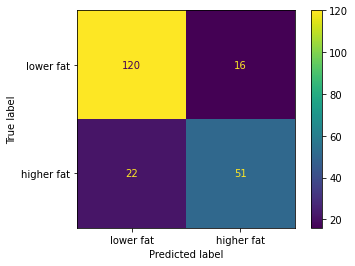

In [70]:
best_model.fit(X_train, y_train)

plot_confusion_matrix(best_model, X_test, y_test, display_labels=['lower fat', 'higher fat'])


In [71]:
print(classification_report(y_test, pred_y,
      target_names=['lower fat', 'higher fat']))

              precision    recall  f1-score   support

   lower fat       0.85      0.88      0.86       136
  higher fat       0.76      0.70      0.73        73

    accuracy                           0.82       209
   macro avg       0.80      0.79      0.80       209
weighted avg       0.82      0.82      0.82       209



# Discussion

In this work, I analyzed the Cheese dataset and tried to compute which feature can produce the best score to predict the target FatLevel. Before answering this question, I did some exploratory data analysis to see which feature would correlate with the target best.

The KNNClassifier has the highest accuracy and precision.  

The test precision score for this model came down to 0.8235513482501435 with 'n_neighbors' set to 7 and 'algorithm' to 'brute' as the optimized settings

# References:

### Introduction to Machine Learning, UBC

### Cheese data - https://github.com/UBC-MDS/intro-ml-students/tree/main/release/final_project/data
